In [1]:
#HOME MADE FUNCTIONS BY CUPANI
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

def plot_2d(data, figsize=(8,8), xlabel='x pixel', ylabel='y pixel', vrange=200, ax=None):
    """ @brief Plot a 2-d array
        @param data 2-d array
        @param figsize Figure size
        @param xlabel X-axis label
        @param ylabel Y-axis label
        @param vrange Range of values around median
        @param ax Axes to overplot on
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if vrange is not None:
        import numpy as np
        vmed = np.median(data)
        vmin, vmax = vmed-vrange/2, vmed+vrange/2
        ax.imshow(data, vmin=vmin, vmax=vmax)
    else:
        ax.imshow(data)
    
    return ax   # ...so it can be used to overplot other stuff
    

def plot_1d(data_x, data_y, figsize=(12,8), xlabel='x pixel', ylabel='y pixel', kind='plot', color='C0', ax=None):
    """ @brief Plot two 1-d arrays one versus the other
        @param data_x 1-d array of x values
        @param data_y 1-d array of y values
        @param figsize Figure size
        @param xlabel X-axis label
        @param ylabel Y-axis label
        @param kind Kind of plot ('plot', 'scatter', 'step')
        @param color Color of plot
        @param ax Axes to overplot on
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    getattr(ax, kind)(data_x, data_y, color=color)  # getattr(ax, 'plot') -> plt.plot, etc.
    
    return ax


def plot_hist(data, bins, figsize=(12,8), xlabel='value', ylabel='frequency', color='C0', ax=None):
    """ @brief Plot a histogram
        @param data 1-d array of values
        @param bins range of bins
        @param figsize Figure size
        @param xlabel X-axis label
        @param ylabel Y-axis label
        @param ax Axes to overplot on
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.hist(data, bins, color=color)
    
    return ax

<Axes: xlabel='x pixel', ylabel='y pixel'>

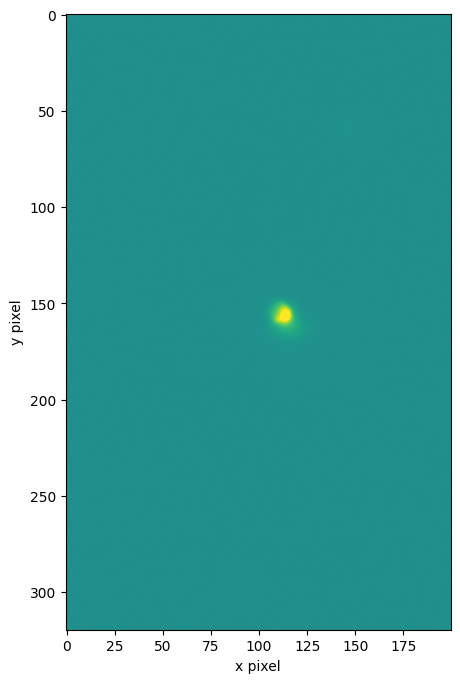

In [7]:
name = '/home/starcat/Scaricati/Calib-Qpani/calib/reducedImg.fit'
hdul = fits.open(name)
hdu = hdul[0]
h =hdu.header
d = hdu.data
d.shape

reg = np.s_[800:920,550:670]
s=d[reg]
plot_2d(s, vrange=25000)